In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



### **SVM**

In [4]:
try:
    df
except NameError:
    df = pd.read_csv("/content/cleanedV2.csv")


def parse_skills(x):
    if isinstance(x, list):
        return x
    if pd.isna(x):
        return []
    try:
        parsed = ast.literal_eval(x)
        if isinstance(parsed, list):

            return [str(s).strip().lower() for s in parsed if str(s).strip()]
        return []
    except Exception:

        if isinstance(x, str):
            return [t.strip().lower() for t in x.replace("[","").replace("]","").split(",") if t.strip()]
        return []

df["Skills_List"] = df["Skills"].apply(parse_skills)


df["text"] = df["Cleaned_Resume"].fillna("") + " " + df["Skills_List"].apply(lambda lst: " ".join(lst))


y = df["Category"].astype(str).values
X_text = df["text"].values

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

clf = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True),
    LinearSVC()
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
report = classification_report(y_test, y_pred, output_dict=False)





metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "F1 (macro)"],
    "Score": [acc, f1_macro]
})
display(metrics_df)
print(report)


student_skills = "python sql machine learning pandas scikit-learn"
predicted_category = clf.predict([student_skills])[0]
print("Predicted Career Path:", predicted_category)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Score
0,Accuracy,0.852941
1,F1 (macro),0.794286


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         1
       Automation Testing       0.50      1.00      0.67         1
               Blockchain       1.00      1.00      1.00         1
         Business Analyst       0.50      1.00      0.67         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       1.00      1.00      1.00         2
                 Database       1.00      1.00      1.00         2
          DevOps Engineer       1.00      1.00      1.00         1
         DotNet Developer       1.00      1.00      1.00         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       1.00      1.00      1.00         1
                       HR       1.00      0.50      0.67         2
                   Hadoop       1.00      1.00      1.00     

### **Logistic regression**

In [10]:
clf_lr = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True),
    LogisticRegression(max_iter=200, solver="liblinear")
)

clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 (macro):", f1_score(y_test, y_pred_lr, average="macro"))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.5882352941176471
F1 (macro): 0.475985347985348
                           precision    recall  f1-score   support

                 Advocate       0.67      1.00      0.80         2
                     Arts       0.00      0.00      0.00         1
       Automation Testing       1.00      1.00      1.00         1
               Blockchain       0.00      0.00      0.00         1
         Business Analyst       0.00      0.00      0.00         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       1.00      1.00      1.00         2
                 Database       0.40      1.00      0.57         2
          DevOps Engineer       1.00      1.00      1.00         1
         DotNet Developer       1.00      0.50      0.67         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       0.00      0.00      0.00         1
                       HR       0.33    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random **forest**


In [12]:
rf_clf = make_pipeline(
    TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True),
    RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7647058823529411
F1 (macro): 0.69

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       0.00      0.00      0.00         1
       Automation Testing       0.50      1.00      0.67         1
               Blockchain       0.00      0.00      0.00         1
         Business Analyst       0.50      1.00      0.67         1
           Civil Engineer       1.00      1.00      1.00         1
             Data Science       1.00      1.00      1.00         2
                 Database       1.00      1.00      1.00         2
          DevOps Engineer       1.00      1.00      1.00         1
         DotNet Developer       1.00      0.50      0.67         2
            ETL Developer       1.00      1.00      1.00         1
   Electrical Engineering       0.00      0.00      0.00         1
                       HR       0.33      1.00      0.50 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Cluster 0:
   net
   asp
   dot net
   dot
   asp net
   css
   mvc
   net developer
   html
   sql

Cluster 1:
   sale
   manager
   management
   business
   team
   mba
   customer
   process
   client
   report

Cluster 2:
   january
   board
   mumbai
   maharashtra
   university january
   llb
   university
   art
   advocate
   maharashtra state

Cluster 3:
   civil
   civil engineer
   engineer
   construction
   site
   autocad
   site engineer
   civil engineering
   engineer civil
   design engineer

Cluster 4:
   exprience less
   less year
   less
   exprience
   year
   year month
   month
   year monthscompany
   matlab
   university skill

Cluster 5:
   electrical
   engineering
   pune
   day
   panel
   conducted
   power
   diploma
   college
   maharashtra

Cluster 6:
   testing
   automation
   selenium
   test
   project
   java
   automation testing
   exprience month
   manual
   test case

Cluster 7:
   data
   hadoop
   hive
   using
   spark
   exprience
   

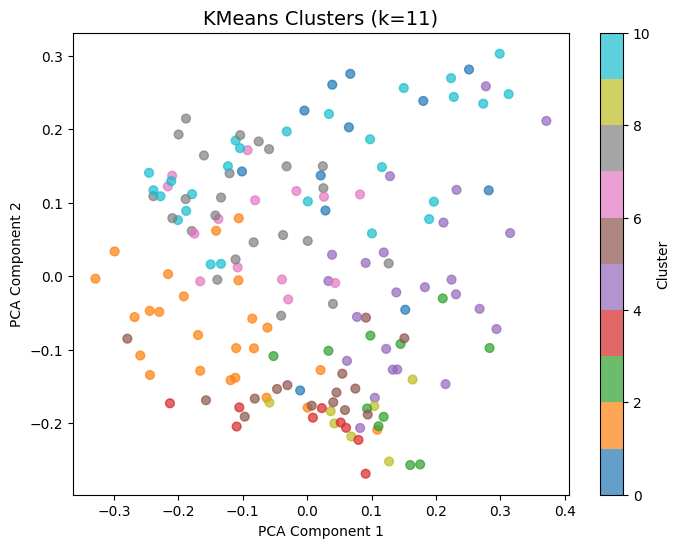

In [18]:
vec = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.9, sublinear_tf=True)
X_all = vec.fit_transform(df["text"].values)


k_candidates = list(range(3, min(12, len(df)//6 + 3)))
sil_scores = []
for k in k_candidates:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labs = km.fit_predict(X_all)
    if len(set(labs)) > 1:
        sil = float(silhouette_score(X_all, labs, metric='cosine'))
    else:
        sil = -1.0
    sil_scores.append(sil)

best_k = int(k_candidates[int(np.argmax(sil_scores))])




kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
cluster_labels = kmeans.fit_predict(X_all)




def top_terms_per_cluster(vec, km, n_terms=10):
    terms = vec.get_feature_names_out()
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    for i in range(km.n_clusters):
        print(f"\nCluster {i}:")
        for ind in order_centroids[i, :n_terms]:
            print("  ", terms[ind])

top_terms_per_cluster(vec, kmeans, n_terms=10)


pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_all.toarray())

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_reduced[:, 0], X_reduced[:, 1],
    c=cluster_labels, cmap="tab10", s=40, alpha=0.7
)

plt.title(f"KMeans Clusters (k={best_k})", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label="Cluster")
plt.show()

In [8]:

X_norm = normalize(X_all, norm="l2", axis=1)


nn = NearestNeighbors(metric="cosine", n_neighbors=10)
nn.fit(X_norm)

example_skills = "python, sql, machine learning, pandas, scikit-learn"


vx = vec.transform([example_skills])
vx = normalize(vx, norm="l2", axis=1)


distances, indices = nn.kneighbors(vx, n_neighbors=8)

similarities = 1 - distances.flatten()


recommended_cats = df.iloc[indices.flatten()]["Category"].values


top_categories = (
    pd.Series(recommended_cats)
    .value_counts()
    .head(5)
    .reset_index()
)
top_categories.columns = ["Recommended Category", "Votes"]


print("Example skills:", example_skills)
print("\nTop recommended categories based on similarity:")
print(top_categories)


summary = {
    "best_k": best_k,
    "example_input": example_skills,
    "recommendations": top_categories.to_dict(orient="records"),
}


Example skills: python, sql, machine learning, pandas, scikit-learn

Top recommended categories based on similarity:
  Recommended Category  Votes
0         Data Science      6
1             Database      1
2     Python Developer      1
